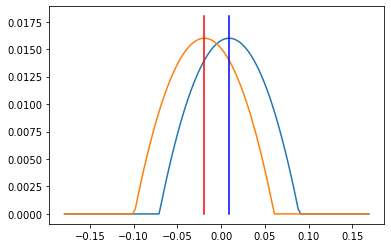

In [37]:
import numpy as np
import random
import matplotlib.pyplot as plt

def my_function(x, delta_x):
  func = -2.5*np.power(x-delta_x,2)+0.016
  func[func < 0] = 0
  return func

sensor_spacing = 0.003

x = np.arange(-0.179, 0.169 + sensor_spacing, sensor_spacing)


random.seed(84134)
delta_x = 0.011
x_offset_from_zero = random.uniform(0, sensor_spacing)
data = my_function(x + x_offset_from_zero, delta_x)

x_hat = np.sum(x * data)/np.sum(data)
x_hat_flipped = np.sum(x * np.flip(data))/np.sum(data)


plt.plot(x,data)
plt.plot(x,np.flip(data))
plt.plot([x_hat,x_hat], [0,0.018], "b")
plt.plot([x_hat_flipped,x_hat_flipped], [0,0.018], "r")

In [27]:
print(x_hat)

0.009220587761714739
